In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
import seaborn as sns


def parratt_reflectivity(wavelength,n_substrate,n_film,t_film,alpha_i):
    k0 = 2*np.pi/wavelength
    num_slice = 150.
    slice_thick = t_film/num_slice
    layers = np.arange(0,-t_film-slice_thick,-slice_thick)
    n_layers = np.zeros((len(layers),1),dtype=np.complex_)
    X = np.zeros((len(layers),1),dtype=np.complex_)
    
    # layer assignments
    n_layers[0] = 1 + 0.j
    n_layers[1:-1] = n_film
    n_layers[-1] = n_substrate
    
    Rf = np.zeros((len(alphai),1),dtype=np.complex_)
    idx = 0
    for k in alphai:
        # z-component of wavevector
        kz = k0*np.sqrt(n_layers**2-np.cos(k)**2)
        r = (kz[0:-1] - kz[1:len(n_layers)+1])/(kz[0:-1] + kz[1:len(n_layers)+1])

        for i in range(len(n_layers)-2,-1,-1):
            X[i] = (np.exp(-2.j*kz[i]*layers[i]) * 
                    (r[i]+X[i+1]*np.exp(2.j*kz[i+1]*layers[i])) / 
                    (1+r[i]*X[i+1]*np.exp(2.j*kz[i+1]*layers[i])))
        Rf[idx] = X[0]
        idx += 1
    return Rf

def EFI_calc(wavelength, n_substrate, n_film, t_film, alpha_i):
    k0 = 2*np.pi/wavelength
    num_slice = 200.
    slice_thick = t_film/num_slice
    layers = np.arange(0,-t_film-slice_thick,-slice_thick)
    layers = layers.reshape(len(layers),1)
    n_layers = np.zeros((len(layers),1),dtype=np.complex_)
    R = np.zeros((len(layers),1),dtype=np.complex_)
    T = np.zeros((len(layers),1),dtype=np.complex_)
    X = np.zeros((len(layers),1),dtype=np.complex_)
    EFI = np.zeros((len(layers),len(alphai)))
    
    # layer assignments
    n_layers[0] = 1 + 0.j
    n_layers[1:-1] = n_film
    n_layers[-1] = n_substrate
    
    Rf = np.zeros((len(alphai),1),dtype=np.complex_)
    idx = 0
    for k in alphai:
        # z-component of wavevector
        kz = k0*np.sqrt(n_layers**2-np.cos(k)**2)
        r = (kz[0:-1] - kz[1:len(n_layers)+1])/(kz[0:-1] + kz[1:len(n_layers)+1]) # for reflectivity calculation
        
        # Recursion to calculate reflectivity at surface
        for i in range(len(n_layers)-2,-1,-1):
            X[i] = (np.exp(-2.j*kz[i]*layers[i]) * 
                    (r[i]+X[i+1]*np.exp(2.j*kz[i+1]*layers[i])) / 
                    (1+r[i]*X[i+1]*np.exp(2.j*kz[i+1]*layers[i])))
        Rf[idx] = X[0]
        R[0] = X[0]
        T[0] = 1
        # Recursion to calculate R, T in film and used to calculate EFI
        rj1j = (kz[1:len(n_layers)+1] - kz[0:-1])/(kz[0:-1] + kz[1:len(n_layers)+1]) # for calculating R, T in film
        tj1j = 1 + rj1j
        for i in range(0,len(n_layers)-1):
            R[i+1] = ((1/tj1j[i]) * 
                      (T[i]*rj1j[i]*np.exp(-1.j*(kz[i+1] + kz[i])*layers[i]) + 
                      R[i]*np.exp(-1.j*(kz[i+1] - kz[i])*layers[i])))
            T[i+1] = ((1/tj1j[i]) * 
                      (T[i]*np.exp(1.j*(kz[i+1] - kz[i])*layers[i]) + 
                      R[i]*rj1j[i]*np.exp(1.j*(kz[i+1] + kz[i])*layers[i])))
        R[-1] = 0
        ER = R*np.exp(1.j*kz*layers)
        ET = T*np.exp(-1.j*kz*layers)
        EFI[:,idx] = (np.abs(ER + ET)**2).ravel()
        idx += 1
    return Rf, EFI

# def layer_construction(n_film,t_film):
#     detail = 5
#     num_slice = detail*t_film
#     slice_thick = t_film/num_slice
#     layers = np.arange(0,-t_film-slice_thick,-slice_thick)
#     n_layers = np.zeros((len(layers),1),dtype=np.complex_)
# def parratt2(wavelength,n_substrate,layers,alpha_i):
#     k0 = 2*np.pi/wavelength
#     n_layers = np.zeros((len(layers),1),dtype=np.complex_)
#     X = np.zeros((len(layers),1),dtype=np.complex_)
    
#     # layer assignments
#     n_layers[0] = 1 + 0.j
#     n_layers[1:-1] = n_film
#     n_layers[-1] = n_substrate
    
#     Rf = np.zeros((len(alphai),1),dtype=np.complex_)
#     idx = 0
#     for k in alphai:
#         # z-component of wavevector
#         kz = k0*np.sqrt(n_layers**2-np.cos(k)**2)
#         r = (kz[0:-1] - kz[1:len(n_layers)+1])/(kz[0:-1] + kz[1:len(n_layers)+1])

#         for i in range(len(n_layers)-2,-1,-1):
#             X[i] = (np.exp(-2.j*kz[i]*layers[i]) * 
#                     (r[i]+X[i+1]*np.exp(2.j*kz[i+1]*layers[i])) / 
#                     (1+r[i]*X[i+1]*np.exp(2.j*kz[i+1]*layers[i])))
#         Rf[idx] = X[0]
#         idx += 1
#     return Rf

In [2]:
# Wavelength and Material parameters
xlambda = 1.54 # wavelength in angstroms

# Silicon
delta_Si = 7.56*10**(-6)
beta_Si = delta_Si/40.
n_Si = complex(1 - delta_Si, beta_Si)

# Polystyrene
delta_PS = 3.5*10**(-6)
beta_PS = delta_PS/200.
tfilm = 2000 # thickness in angstroms
n_PS = complex(1-delta_PS, beta_PS)


In [21]:
alphai = np.arange(0.1,1,.0005)/180*np.pi
# alphai = [0.18*180/np.pi]
ref1 = parratt_reflectivity(1.54,n_Si,n_PS,800,alphai)
ref2 = parratt_reflectivity(1.54,n_Si,n_PS,1000,alphai)

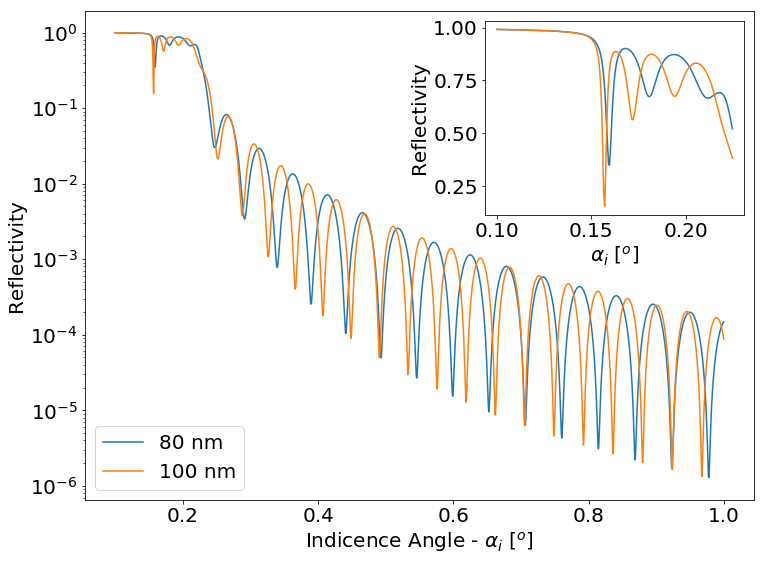

In [35]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(12,9))
ax.semilogy(alphai*180/np.pi,np.abs(ref1)**2)
ax.semilogy(alphai*180/np.pi,np.abs(ref2)**2)
plt.xlabel(r'Indicence Angle - $\alpha_i$ $[^o]$')
plt.ylabel('Reflectivity')
plt.legend(('80 nm','100 nm'),loc='lower left')
axins = inset_axes(ax, width=3.6, height=2.7)
axins.plot(alphai[0:250]*180/np.pi,np.abs(ref1[0:250])**2)
axins.plot(alphai[0:250]*180/np.pi,np.abs(ref2[0:250])**2)
plt.xlabel(r'$\alpha_i$ $[^o]$')
plt.ylabel('Reflectivity')
plt.show()

In [36]:
alphai = np.arange(0.1,.25,.0005)/180*np.pi
# alphai = [0.1*np.pi/180]
Rf, EFI = EFI_calc(1.54,n_Si,n_PS,1000,alphai)
avg_EFI = np.average(EFI,axis=0)

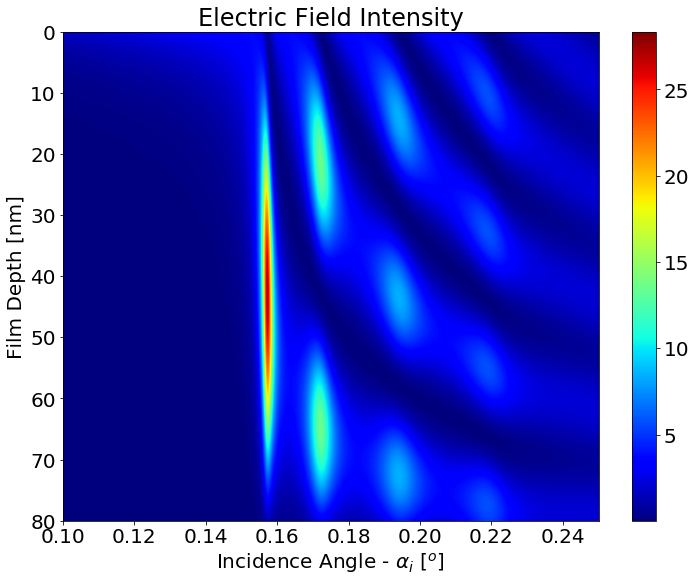

In [37]:
fig, ax = plt.subplots(figsize=(12,9))
imgplot = ax.imshow(EFI,cmap="jet",Interpolation='bicubic',extent=[0.1, 0.25, 80, 0])
ax.set_aspect('auto')
plt.colorbar(imgplot)
plt.xlabel(r'Incidence Angle - $\alpha_i$ $[^o]$')
plt.ylabel('Film Depth [nm]')
plt.title('Electric Field Intensity')
plt.show()

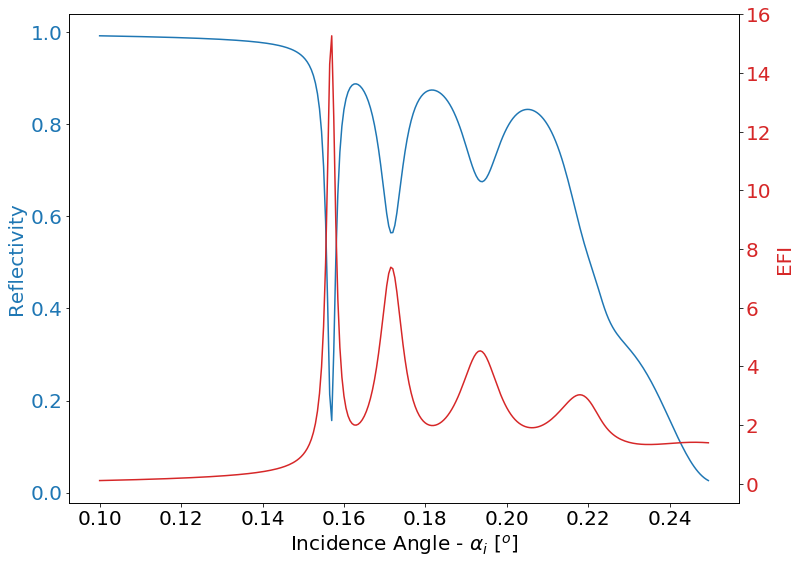

In [45]:
fig, ax1 = plt.subplots(figsize=(12,9))
ax1.plot(alphai*180/np.pi,np.abs(Rf)**2)
color = 'tab:blue'
ax1.set_xlabel(r'Incidence Angle - $\alpha_i$ $[^o]$')
ax1.set_ylabel('Reflectivity', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('EFI', color=color)  # we already handled the x-label with ax1
ax2.plot(alphai*180/np.pi,avg_EFI,color=color)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.plot(alphai*180/np.pi, EFI[-1,:],color='k')

plt.show()